#K_medias (Desde cero)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,4)
plt.style.use('ggplot')

In [ ]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
C = np.array([[8,10],[3,10.5]])

In [ ]:
np.sqrt((C[0,0] - C[1,0])**2 + (C[0,1] - C[1,1])**2)

5.024937810560445

In [ ]:
np.linalg.norm(C[0] - C[1])

5.024937810560445

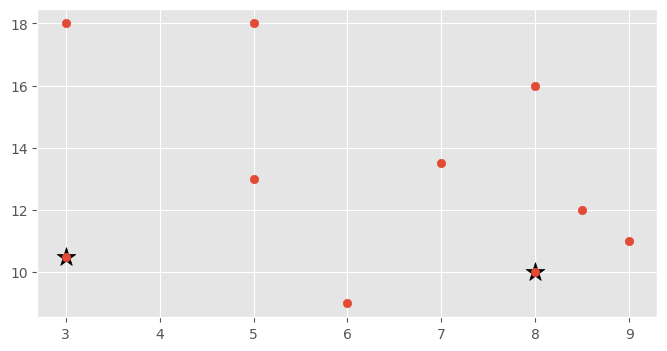

In [ ]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 200, c = 'k')
plt.scatter(data[:,0], data[:,1])

In [ ]:
distances = []
clusters = []

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Grupos
for i in range(len(data)):
    distance = dist(data[i], C) # Distancia del punto actual a las k-medias
    distances.append(distance)
    cluster = np.argmin(distance) # Grupo al que pertenece
    clusters.append(cluster)

print(clusters, '\n', np.array(distances))

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0] 
 [[0.         5.02493781]
 [5.02493781 0.        ]
 [3.64005494 5.        ]
 [8.54400375 7.76208735]
 [4.24264069 3.20156212]
 [2.23606798 3.35410197]
 [1.41421356 6.02079729]
 [9.43398113 7.5       ]
 [2.06155281 5.70087713]
 [6.         7.43303437]]


In [ ]:
# Recalcular centroides
for i in range(len(C)):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    # print(points )
    C[i] = np.mean(points, axis=0)

C

array([[ 7.75      , 11.91666667],
       [ 4.        , 14.875     ]])

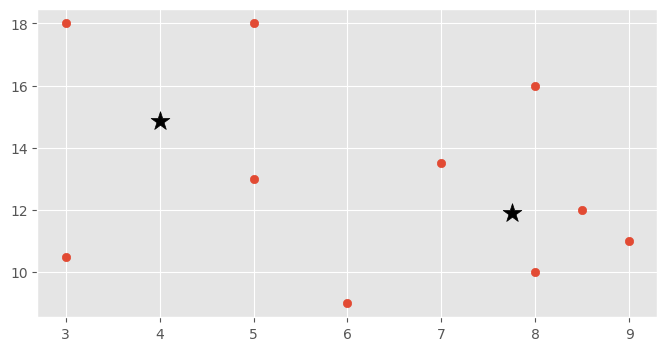

In [ ]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 200, c = 'k')
plt.scatter(data[:,0], data[:,1])

# K-medias(BootCamp)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
plt.style.use('ggplot')

In [ ]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/refs/heads/master/csv/cluster/xclara.csv'
data = pd.read_csv(url)
print(data.shape)
data.head()

(3000, 3)


,rownames,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


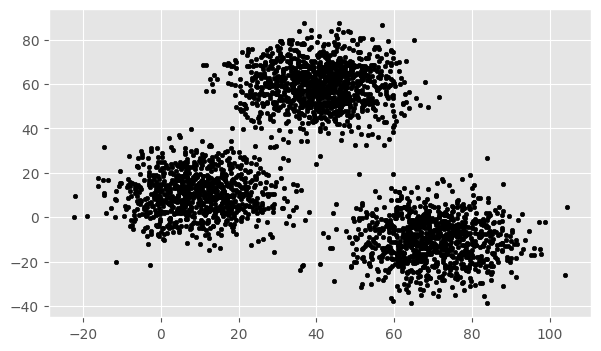

In [ ]:
#EDA
v1, v2 = data['V1'].values, data.V2.values
plt.scatter(v1, v2, c='black', s=10)

In [ ]:
from sklearn.cluster import KMeans
X = np.array(list(zip(v1,v2))) #Si tenemos los datos por separado, las junta
km = KMeans(n_clusters=3, n_init='auto') #Numero de grupos a formar # , n_init='auto'
km = km.fit(X) #Entrenamiento en X
y_hat = km.predict(X) #Prediccion, le pone colores , para identirifaclor
C =  km.cluster_centers_ #Centroides(Medias)

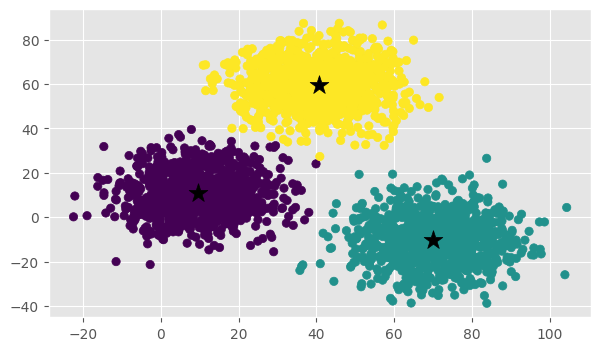

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y_hat)
plt.scatter(C[:,0],C[:,1], c='k', s=200, marker='*')

# Grafica de codo: Deterimar numero de grupos (Desde cero)

In [ ]:
import seaborn as sns
sns.set()

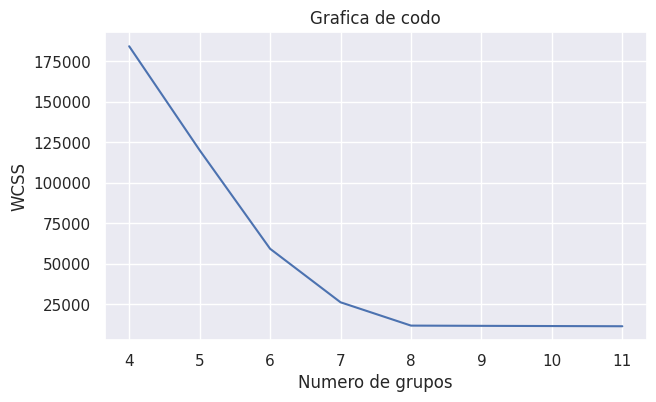

In [ ]:
# 'Desde cero'
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
#Buscar numero optimo de grupos
WCSS = [] # Within Cluster Sum of Squeres
for i in range(4,12):
  km = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=0)
  km.fit(X)
  WCSS.append(km.inertia_)

#Grafica
plt.plot(range(4,12), WCSS)
plt.title('Grafica de codo')
plt.xlabel('Numero de grupos')
plt.ylabel('WCSS')
plt.show()

# Grafica de codo(Bootcamp)

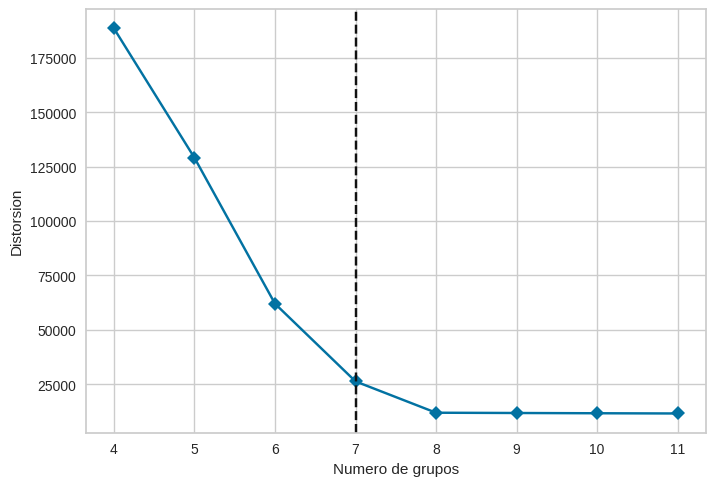

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
X,_ = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
#Grafica
vis = KElbowVisualizer(KMeans(n_init='auto'), k = (4,12), timings=False)
vis.fit(X)
plt.xlabel('Numero de grupos')
plt.ylabel('Distorsion')
plt.show()

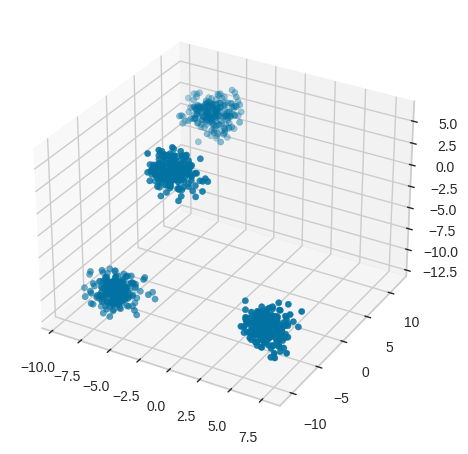

In [ ]:
#3D
from mpl_toolkits.mplot3d import Axes3D
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
plt.show()

In [ ]:
km = KMeans(n_clusters=4, n_init='auto')
km = km.fit(X)
y_hat = km.predict(X)
C = km.cluster_centers_
C

array([[-6.17689896,  9.61284829,  2.31431214],
       [-6.74520188, -7.52061627, -9.82482496],
       [-3.52498944, -3.67884079,  3.22417308],
       [ 5.58581617, -6.90844966, -8.954173  ]])

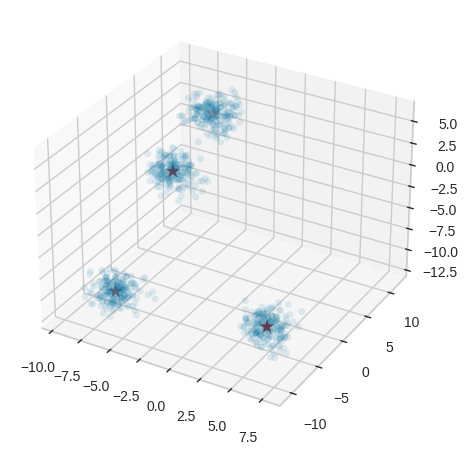

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.1)
ax.scatter(C[:,0], C[:,1], C[:,2], s=100, marker= '*', c='r')
plt.show()

# Ejemplo de China

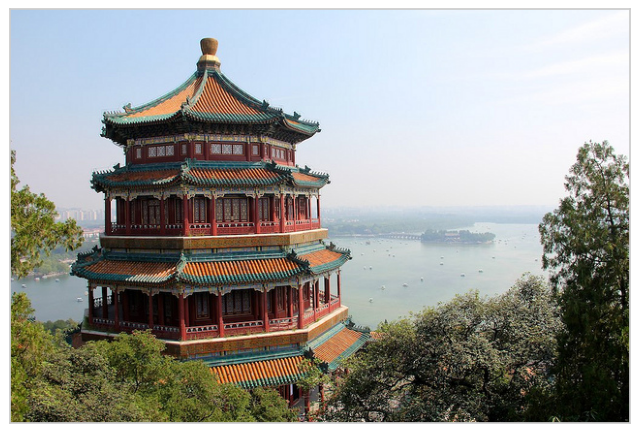

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

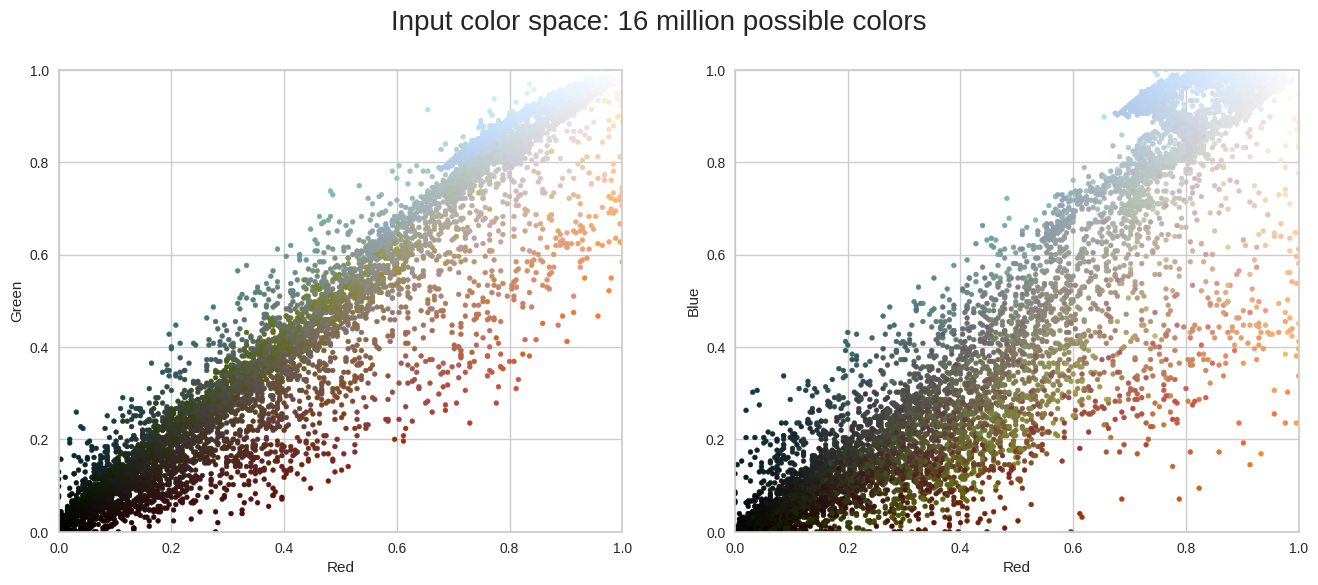

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

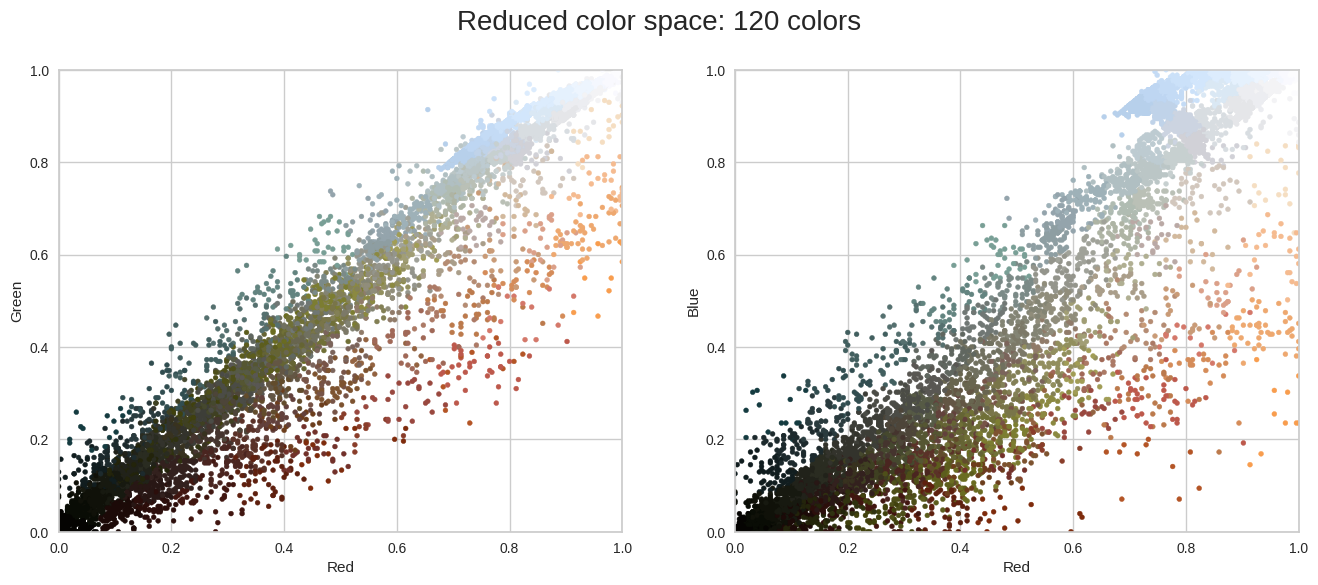

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(120)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 120 colors")

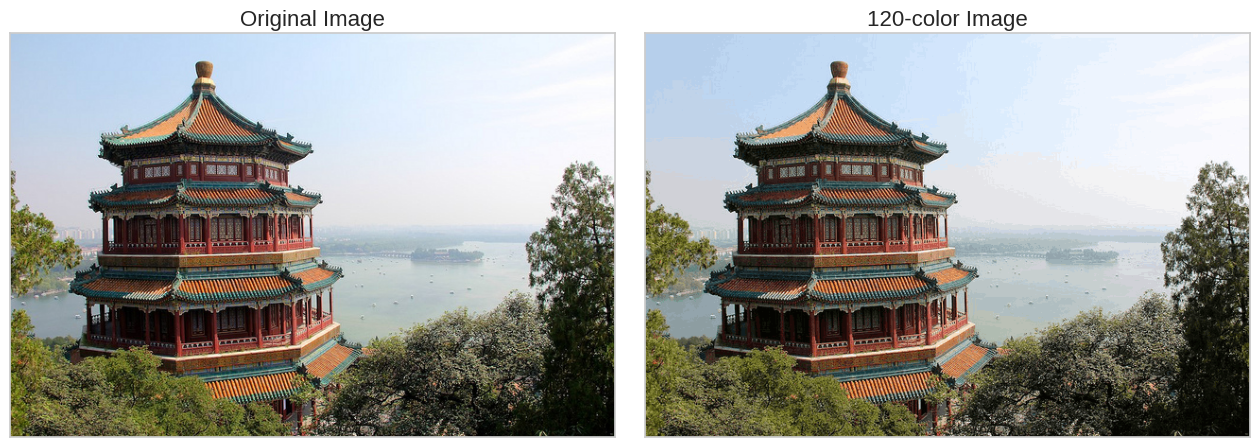

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('120-color Image', size=16);